## Homework 2: Simple Stock Analysis
The objective of this homework is to practice working with Pandas Series. To successfully complete this homework, you may use any resources available to you.

You need to accomplish the following tasks:

* Download the Apple stock data for the timeframe of 1982 to today.
* Use the %magic command to activate inline matplotlib graphs
* Provide an overview of the Close series of the Apple stock.
* Identify three approaches of obtaining the maximum closing price. What is the difference between the approaches?
* Find the timeframes with the highest stock price surge in five days. Can you explain why these five dates?
* Resample the Close series to represent business quarters with a financial year that ends in September.
* Identify series of four quarters with the an overall surge in the stock prices that is larger than 100 percent. Can you explain why the larges surge happened? Visualize it.
* If you use tutorials/code snippets that you find on the internet to complete this task, make sure that you reference them. Also make sure that the Jupyter notebook is free of mistakes, well-documented, and professionally formatted before you submit it.


### Data Reader to fetch the Financial Data.
pandas_datareader is used to get financial data required for this assignment. It has been removed from the pandas package and has been stored as a github repo on this link : https://github.com/pydata/pandas-datareader.

Anaconda Navigator is the software that has been used to run the Jupyter notebook and so it has pandas_datareader pre-installed and can be imported directly.



In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import pandas
import pandas_datareader
import datetime as dt

Now, the data for the prices are to be obtained. This financial data can be made available by using the pandas_datareader package. 
For this exercise, the close value of Apple's stock prices are needed. This could be obtained by using the "DataReader()". 

According to the requirement, the close series of 'Apple' is to be found out. The Ticker symbol of Apple is 'AAPL'. The timeframe which is considered in this example is from 1/1/1982 to current date.

The Ticker Symbol,start and end dates are to be passed as parameters to a function readData which returns the dataframe with the financial data. For this purpose, inside the function 

Pandas Datareader documentation was referred to implement.

https://media.readthedocs.org/pdf/pandas-datareader/latest/pandas-datareader.pdf

In [11]:
def readData(startDate,endDate,compTicker):
    dataF = pandas_datareader.DataReader(compTicker,"yahoo",startDate,endDate)
    return dataF

In [39]:
start = dt.datetime(1982,1,1)
end = dt.date.today()
compTicker = 'AAPL'
dataFrame = readData(start,end,compTicker)
dataFrame.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-01-04,0.395089,0.395089,0.392857,0.392857,0.321458,17813600
1982-01-05,0.377232,0.377232,0.372768,0.372768,0.305020,8960000
1982-01-06,0.370536,0.370536,0.368304,0.368304,0.301367,16520000
1982-01-07,0.343750,0.343750,0.339286,0.339286,0.277623,17511200
1982-01-08,0.354911,0.357143,0.354911,0.354911,0.290408,14151200


In [186]:
dataFrame.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-01-04,0.395089,0.395089,0.392857,0.392857,0.321458,17813600
1982-01-05,0.377232,0.377232,0.372768,0.372768,0.305020,8960000
1982-01-06,0.370536,0.370536,0.368304,0.368304,0.301367,16520000
1982-01-07,0.343750,0.343750,0.339286,0.339286,0.277623,17511200
1982-01-08,0.354911,0.357143,0.354911,0.354911,0.290408,14151200


A overview of the dataset could be obtained with the help of the describe() function. It gives a summary of the dataFrame. 

In [40]:
dataFrame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9.091000e+03
mean,22.768566,22.984293,22.534710,22.765867,21.386560,9.126859e+07
std,39.694619,40.003395,39.366172,39.697882,38.247234,8.756896e+07
min,0.198661,0.198661,0.196429,0.196429,0.160729,3.472000e+05
25%,1.098214,1.125000,1.066696,1.092143,0.961425,3.646665e+07
50%,1.669643,1.705357,1.638571,1.669643,1.465028,6.291460e+07
75%,23.539285,23.884286,23.094286,23.522858,21.086674,1.130290e+08
max,179.369995,180.100006,178.250000,179.259995,179.259995,1.855410e+09


A new series closingPrices is created which holds the values of the closing prices of the financial data that has been obtained.

In [45]:
closingPrices = dataFrame['Close']

A sample of the series newly created is obtained which has the dates as the index and the closing prices of the stock as the values. The tail() function is used to display the last few elements of the closingPrices series.

In [50]:
closingPrices.tail()

Date
2018-01-12    177.089996
2018-01-16    176.190002
2018-01-17    179.100006
2018-01-18    179.259995
2018-01-19    178.460007
Name: Close, dtype: float64

The easiest way to identify the highest prices in the ClosingPrices series is to use in-built functions that are available with pandas. Here max() function is used to display the highest closing price in the closingPrices series.

In [51]:
closingPrices.max()

179.259995

The other in-built fucntion that could be used is the nlargest() function, this function takes in a parameter of integer 'n' to display n number of results sorted in the descending order. The advantage of this method is that the index is also displayed.

In [52]:
closingPrices.nlargest(1)

Date
2018-01-18    179.259995
Name: Close, dtype: float64

In [114]:
closingPrices.head()

Date
1982-01-04    0.392857
1982-01-05    0.372768
1982-01-06    0.368304
1982-01-07    0.339286
1982-01-08    0.354911
Name: Close, dtype: float64

Another method could be sorting the series and displayying the first element of the series to get the maximum value of the series.

Here, the sort_values function could be used to sort the values of the series, parameter ascending is set as false to sort by descending.

But other approaches are easier to do than this.

In [58]:
arrPriceList = closingPrices[closingPrices.sort_values(ascending = False)]

In [126]:
arrPriceList.head(1)

Close
179.259995   NaN
Name: Close, dtype: float64

The matplotlib inline magic command can be used to plot the close series of Apple stock data. This could be used to get better understanding of the data over the years as a visual representation.

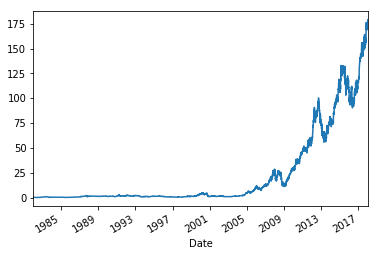

In [64]:
%matplotlib inline 
closingPrices.plot();

### Closing Prices Overview
Over the years, the price of Apple stocks have been increasing at a very good rate. The surge in prices can be especially seen after the 2007. This could be due to their entry into the smartphone market that could have pushed their stock prices even further. There are also some dips after this entry for example in 2008-2009, this might have been due to global economic slowdown at that time. But a closer look needs to be taken to have a clearer idea about the stock prices.

In [185]:
closingPrices.nlargest(5)

Date
2018-01-18    179.259995
2018-01-17    179.100006
2018-01-19    178.460007
2018-01-12    177.089996
2017-12-18    176.419998
Name: Close, dtype: float64

In [179]:
closingPrices.head()

Date
1982-01-04    0.392857
1982-01-05    0.372768
1982-01-06    0.368304
1982-01-07    0.339286
1982-01-08    0.354911
Name: Close, dtype: float64

### Resampling to understand the data better.
Resampling is used to get better understanding of data. The resample() function is used to either upsample or downsample the number of observations in the series. Here, the series is downsampled to display only the 1st and 5th day with respect to the closing prices.

The following was used as resource to understand the working of resample() function.

https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781788394697/5/ch05lvl1sec36/upsampling-time-series-data

http://benalexkeen.com/resampling-time-series-data-with-pandas/

In [130]:
closeSeriesR = closingPrices.resample('5D').ffill()

In [132]:
closeSeriesR.head()

Date
1982-01-04    0.392857
1982-01-09    0.354911
1982-01-14    0.334821
1982-01-19    0.354911
1982-01-24    0.370536
Freq: 5D, Name: Close, dtype: float64

The percentage change of the closing price from the 1st day x, to the 5th day x+5 can be calculated using the in-built function 'pct_change()' applied on the series closeSeriesR would return the percentage difference between the closing values of particular dates.

The Pandas documentation was used to understand the working of the pct_change() function.
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html

The largest 5 percentage differences could be taken from this by cascading to the 'nlargest()' function. The parameter to this function is the number '5' as we need the first 5 largest percentage differences.

In [133]:
closeSeriesR.pct_change().nlargest(5)

Date
1997-08-08    0.397393
2003-05-09    0.266436
1998-01-05    0.209523
1999-07-09    0.201079
1983-01-14    0.200002
Name: Close, dtype: float64

* 1997-08-08 

The largest difference was on 1997/08/08, just 2 days after Microsoft had invested $150 Million in Apple to keep it running. The other reason also extending support of Microsoft Office tools to the MacOS platform. Apple was struggling to make profits for 18 months in a row and the market had shown positive sign when there was still chances that the company could succeed in the future.

Source - https://www.wired.com/2009/08/dayintech_0806/

* 2003-05-09

The launch of Apple iTunes music software could be attributed to the 26pc increase in the stock price. Apple saw about 1 Million downloads of songs in just the first week of the launch of iTunes.

Source - https://www.apple.com/newsroom/archive/?page=53

The other dates did not return any important events at Apple so they are not mentioned. There could be different reasons as to why there was a price surge during the above times, the main reason could be attributed to the fact that the top 5 of the dates are either mondays or fridays when the trading is the starting of the week or ending of the week.

To resample the series based on Quarter based data the resample method is used. Here the quarters should end in september of every year according to the requirement. So, the resample function is used here based on 'Q' rather than 'D'. And 'sep' is passed along with the parameter to tell that the quarter ends in september.

https://github.com/pandas-dev/pandas/issues/2764https://github.com/pandas-dev/pandas/issues/2764

In [157]:
closeSeriesQ = closingPrices.resample('Q-sep').mean()

In [178]:
closeSeriesQ.pct_change().tail()

Date
2017-03-31    0.161496
2017-06-30    0.122713
2017-09-30    0.049323
2017-12-31    0.077201
2018-03-31    0.049676
Freq: Q-SEP, Name: Close, dtype: float64

In [181]:
closeSeriesP = closeSeriesQ.pct_change()

In [183]:
closeSeriesP.nlargest(5)

Date
1982-12-31    0.859333
2004-12-31    0.673326
1991-03-31    0.635948
1987-03-31    0.568630
1999-12-31    0.452867
Name: Close, dtype: float64

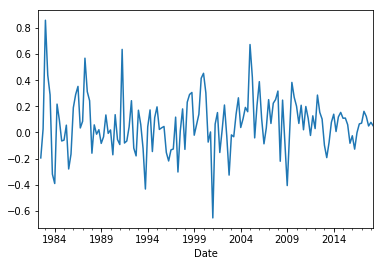

In [184]:
%matplotlib inline 
closeSeriesP.plot();

### Overview of Quarter based performance
Based on the data I had arrived at. I did not get any surges above 100 percent when comparing the quarterly results. The largest list of price surges were during the following.

Date
1982-12-31    0.859333
2004-12-31    0.673326
1991-03-31    0.635948
1987-03-31    0.568630
1999-12-31    0.452867

The strong performance of Apple in 1980's could be attributed to the fact that they had released 2nd version of their apple systems and were starting to gain a market share. That would be the reason for the high percentage change. And the prices of the shares were pretty low at that time of time, so even a small change in stock price would result in a bigger percentage difference.

In the year 2004, Apple had released the iMac G5 model and this could explain why the percentage difference is higher for this quarter. Due to the success of the iMac G5 model which was dubbed as the slimmest desktop at that time, there could have been higher sales of these machines than the previous quarters.

The main reasons for the increase in stock prices in 1999 could be due to the release of the iMac desktops which were selling well in the market and had brought the company back from a straight losses of 4 years. 

Source : https://www.apple.com/newsroom/2004/08/31Apple-Unveils-the-New-iMac-G5/
         https://en.wikipedia.org/wiki/Apple_II_series
         https://www.barrons.com/articles/how-apple-became-the-first-800-billion-stock-1494363792